## Problem1

An analytics company has been tasked with the crucial job of finding out what factors affect a startup company and if it will be profitable or not. For this, they have collected some historical data and would like to apply multilinear regression to derive brief insights into their data. Predict profit, given different attributes for various startup companies.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('50_Startups.csv')

In [3]:
data.shape

(50, 5)

### Null values imputation

In [4]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

We observe that Actual_Shipment_Time, Shipment_Delay and Delivery_Status are null for the same set of rows. Remaining null values (406) are in Planned_TimeofTravel. We can drop these 82008 rows.

In [5]:
#Drop null valued rows
#data.dropna(inplace=True)

In [6]:
data.shape

(50, 5)

In [7]:
data.isnull().sum().sum()

0

In [8]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### EDA

In [9]:
data.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [10]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


<AxesSubplot:>

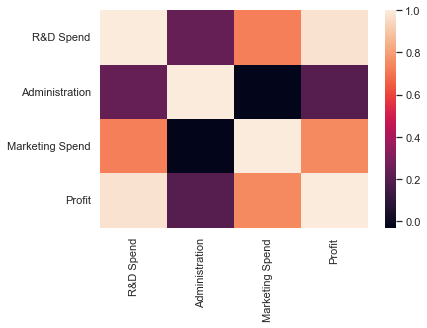

In [12]:
import seaborn as sns
sns.set()
sns.heatmap(data.corr())

In [13]:
import matplotlib.pyplot as plt

#### Label Encode

In [14]:
# Label encode Class variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['State'] = encoder.fit_transform(data['State'])

In [15]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


#### Drop Duplicates

In [16]:
data.duplicated().sum()

0

In [17]:
#data.drop_duplicates(subset=None, keep='first', inplace=True)

In [18]:
#data.shape

In [19]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State                int32
Profit             float64
dtype: object

In [20]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

#### standardize

In [21]:
data.iloc[:,0:4]

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1
5,131876.90,99814.71,362861.36,2
6,134615.46,147198.87,127716.82,0
7,130298.13,145530.06,323876.68,1
8,120542.52,148718.95,311613.29,2
9,123334.88,108679.17,304981.62,0


In [22]:
### Standardization
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
# Initialise the Scaler
#scaler = MinMaxScaler()
# To scale data
#scaler.fit_transform(data.iloc[:,0:4])
#ct = ColumnTransformer([('MinMax', MinMaxScaler(), data.iloc[:,0:4])],'passthrough')

numerical_columns = ['R&D Spend', 'Administration', 'Marketing Spend', 'State']
#column_trans = make_column_transformer((numerical_columns, RobustScaler()),remainder='passthrough')
#column_trans.fit_transform(data)

preprocess = make_column_transformer(
    (StandardScaler(),numerical_columns),
    ('passthrough',['Profit'])
)
data1= preprocess.fit_transform(data)
data1= pd.DataFrame(data1)
data1.columns= data.columns

In [23]:
data1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,2.016411,0.560753,2.153943,1.212678,192261.83
1,1.955860,1.082807,1.923600,-1.212678,191792.06
2,1.754364,-0.728257,1.626528,0.000000,191050.39
3,1.554784,-0.096365,1.422210,1.212678,182901.99
4,1.504937,-1.079919,1.281528,0.000000,166187.94
5,1.279800,-0.776239,1.254210,1.212678,156991.12
6,1.340066,0.932147,-0.688150,-1.212678,156122.51
7,1.245057,0.871980,0.932186,0.000000,155752.60
8,1.030369,0.986952,0.830887,1.212678,152211.77
9,1.091819,-0.456640,0.776107,-1.212678,149759.96


In [24]:
data1.rename(columns = {'R&D Spend':'RDSpend', 'Marketing Spend':'MarketingSpend'}, inplace = True)

In [25]:
# preparing model considering all the variables 
import statsmodels.formula.api as smf # for regression model
         
ml1 = smf.ols('Profit ~ RDSpend + Administration + MarketingSpend +  State ', data = data1).fit() # regression model
# Summary
ml1.summary()
# p-values for WT, VOL are more than 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           8.51e-29
Time:                        21:31:01   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        1.12e+05   1320.074     84.853      0.000    1.09e+05    1.15e+05
RDSpend         3.661e+04   2079.348     17.609      0.000    3.24e+04    4.08e+04
Administration  -744.0474   1431.118     -0.520      0.606   -3626.467    2138.372
MarketingSpend  3296.2152   2013.613      1.637      0.109    -759.409    7351.839
State            -18.4060   1327.499     -0.014      0.989   -2692.126    2655.314
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                         2.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Administration has P value >0.05

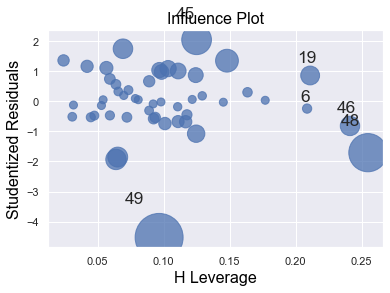

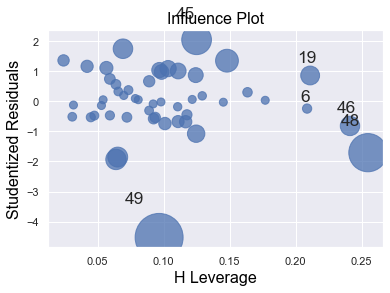

In [26]:
# Checking whether data has any influential values 
# Influence Index Plots
import statsmodels.api as sm

sm.graphics.influence_plot(ml1)
# Studentized Residuals = Residual/standard deviation of residuals
# index 76 is showing high influence so we can exclude that entire row

In [105]:
data1_new = data1.drop(data1.index[[49]])

# Preparing model                  
ml_new = smf.ols('Profit ~  Administration + MarketingSpend +  State ', data = data1_new).fit() # regression model

# Summary
ml_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     22.61
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           4.45e-09
Time:                        17:11:44   Log-Likelihood:                -563.44
No. Observations:                  49   AIC:                             1135.
Df Residuals:                      45   BIC:                             1142.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.132e+05   3558.953     31.797      0.000    1.06e+05     1.2e+05
Administration  8740.2578   3524.279      2.480      0.017    1641.996    1.58e+04
MarketingSpend  2.851e+04   3596.447      7.928      0.000    2.13e+04    3.58e+04
State            346.0199   3578.671      0.097      0.923   -6861.794    7553.834
==============================================================================
Omnibus:                        6.651   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                7.276
Skew:                          -0.452   Prob(JB):                       0.0263
Kurtosis:                       4.657   Cond. No.                         1.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
data1

,RDSpend,Administration,MarketingSpend,State,Profit
0,2.016411,0.560753,2.153943,1.212678,192261.83
1,1.955860,1.082807,1.923600,-1.212678,191792.06
2,1.754364,-0.728257,1.626528,0.000000,191050.39
3,1.554784,-0.096365,1.422210,1.212678,182901.99
4,1.504937,-1.079919,1.281528,0.000000,166187.94
5,1.279800,-0.776239,1.254210,1.212678,156991.12
6,1.340066,0.932147,-0.688150,-1.212678,156122.51
7,1.245057,0.871980,0.932186,0.000000,155752.60
8,1.030369,0.986952,0.830887,1.212678,152211.77
9,1.091819,-0.456640,0.776107,-1.212678,149759.96


In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data2 = data1.iloc[:,:-1]  
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data2.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data2.values, i)
                          for i in range(len(data2.columns))]
  
print(vif_data)

          feature       VIF
0         RDSpend  2.481178
1  Administration  1.175315
2  MarketingSpend  2.326780
3           State  1.011281


In [32]:
# Check for Colinearity to decide to remove a variable using VIF
# Assumption: VIF > 10 = colinearity
# calculating VIF's values of independent variables
rsq_RDSpend = smf.ols('RDSpend ~  Administration + MarketingSpend +  State ', data = data1).fit().rsquared  
vif_RDSpend = 1/(1 - rsq_RDSpend) 

rsq_adm = smf.ols('Administration ~   RDSpend + MarketingSpend +  State ', data = data1).fit().rsquared   
vif_adm = 1/(1 - rsq_adm)

rsq_ms = smf.ols('MarketingSpend ~  Administration + RDSpend +  State ', data = data1).fit().rsquared  
vif_ms = 1/(1 - rsq_adm) 

rsq_st = smf.ols('State ~  Administration + MarketingSpend + RDSpend  ', data = data1).fit().rsquared  
vif_st = 1/(1 - rsq_st) 

# Storing vif values in a data frame
d1 = {'Variables':['RDSpend', 'Administration', 'MarketingSpend', 'State'], 'VIF':[vif_RDSpend, vif_adm,vif_ms, vif_st]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RDSpend,2.481178
1,Administration,1.175315
2,MarketingSpend,1.175315
3,State,1.011281


we find rdspend has highest collinearity and correlation and dropped in our model above

In [33]:
# Final model
final_ml = smf.ols('Profit ~  Administration + MarketingSpend +  State ', data = data1).fit()
final_ml.summary()     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     24.12
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           1.58e-09
Time:                        21:32:37   Log-Likelihood:                -577.03
No. Observations:                  50   AIC:                             1162.
Df Residuals:                      46   BIC:                             1170.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        1.12e+05   3667.519     30.542      0.000    1.05e+05    1.19e+05
Administration  8954.1095   3669.797      2.440      0.019    1567.191    1.63e+04
MarketingSpend      3e+04   3680.658      8.150      0.000    2.26e+04    3.74e+04
State           1625.7459   3679.013      0.442      0.661   -5779.723    9031.215
==============================================================================
Omnibus:                        6.485   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                6.530
Skew:                          -0.490   Prob(JB):                       0.0382
Kurtosis:                       4.474   Cond. No.                         1.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# Prediction
pred = final_ml.predict(data1)

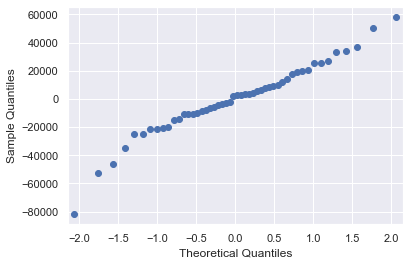

In [35]:
# Q-Q plot
res = final_ml.resid
sm.qqplot(res)
plt.show()

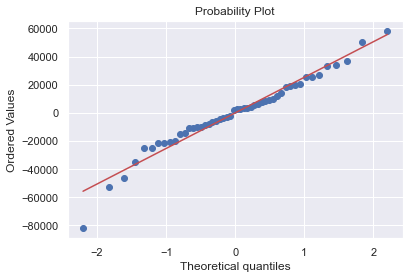

In [36]:
# Q-Q plot
from scipy import stats
import pylab
stats.probplot(res, dist = "norm", plot = pylab)
plt.show()

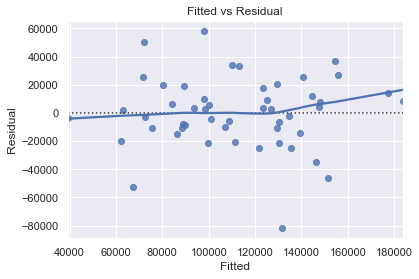

In [37]:
# Residuals vs Fitted plot
sns.residplot(x = pred, y = data.Profit, lowess = True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

In [38]:
### Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data1, test_size = 0.2) # 20% test data

In [39]:
# preparing the model on train data 
model_train = smf.ols('Profit ~  Administration + MarketingSpend +  State ', data = data1).fit()

# prediction on test data set 
test_pred = model_train.predict(data_test)

# test residual values 
test_resid = test_pred - data_test.Profit
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse

15379.126388254857

In [40]:
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     24.12
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           1.58e-09
Time:                        21:32:38   Log-Likelihood:                -577.03
No. Observations:                  50   AIC:                             1162.
Df Residuals:                      46   BIC:                             1170.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        1.12e+05   3667.519     30.542      0.000    1.05e+05    1.19e+05
Administration  8954.1095   3669.797      2.440      0.019    1567.191    1.63e+04
MarketingSpend      3e+04   3680.658      8.150      0.000    2.26e+04    3.74e+04
State           1625.7459   3679.013      0.442      0.661   -5779.723    9031.215
==============================================================================
Omnibus:                        6.485   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                6.530
Skew:                          -0.490   Prob(JB):                       0.0382
Kurtosis:                       4.474   Cond. No.                         1.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# train_data prediction
train_pred = model_train.predict(data_train)

# train residual values 
train_resid  = train_pred - data_train.Profit
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse

26726.124493170886

In [42]:
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     24.12
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           1.58e-09
Time:                        21:32:38   Log-Likelihood:                -577.03
No. Observations:                  50   AIC:                             1162.
Df Residuals:                      46   BIC:                             1170.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        1.12e+05   3667.519     30.542      0.000    1.05e+05    1.19e+05
Administration  8954.1095   3669.797      2.440      0.019    1567.191    1.63e+04
MarketingSpend      3e+04   3680.658      8.150      0.000    2.26e+04    3.74e+04
State           1625.7459   3679.013      0.442      0.661   -5779.723    9031.215
==============================================================================
Omnibus:                        6.485   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                6.530
Skew:                          -0.490   Prob(JB):                       0.0382
Kurtosis:                       4.474   Cond. No.                         1.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""